### Part 1 ‐ Exploratory data analysis

The attached _logins.json_ file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15­minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

### Approach:
- Load the file using pandas into a dataframe and manipulate the data for analysis
- Group the data into many time intervals:
    - 15 minutes
    - Individual months (Jan, Feb, March, and April)
    - Day of week
    - Hour of day
- Create visualization of each time intervals to see any trends or cycles.

In [2]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
with open("logins.json", "r") as read_file:
    data = json.load(read_file)

In [3]:
logins = pd.DataFrame(data)
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
df_login_time = pd.DataFrame(pd.to_datetime(logins.login_time, format ='%Y-%m-%d'))
df_login_time.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [5]:
# Setting the index with 'login_time'
df_login_time = df_login_time.set_index(['login_time'])
# Adding count to the dataframe to be aggregated
df_login_time['count'] = 1
# Counting each 15-minute intervals
df_login_time = df_login_time.resample('15T').count()

# Reset index
df_login_time = df_login_time.reset_index()
df_login_time.head()

,login_time,count
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1


(array([719160., 719163., 719177., 719191., 719194., 719208., 719222.,
        719236., 719250., 719253., 719267.]),
 <a list of 11 Text xticklabel objects>)

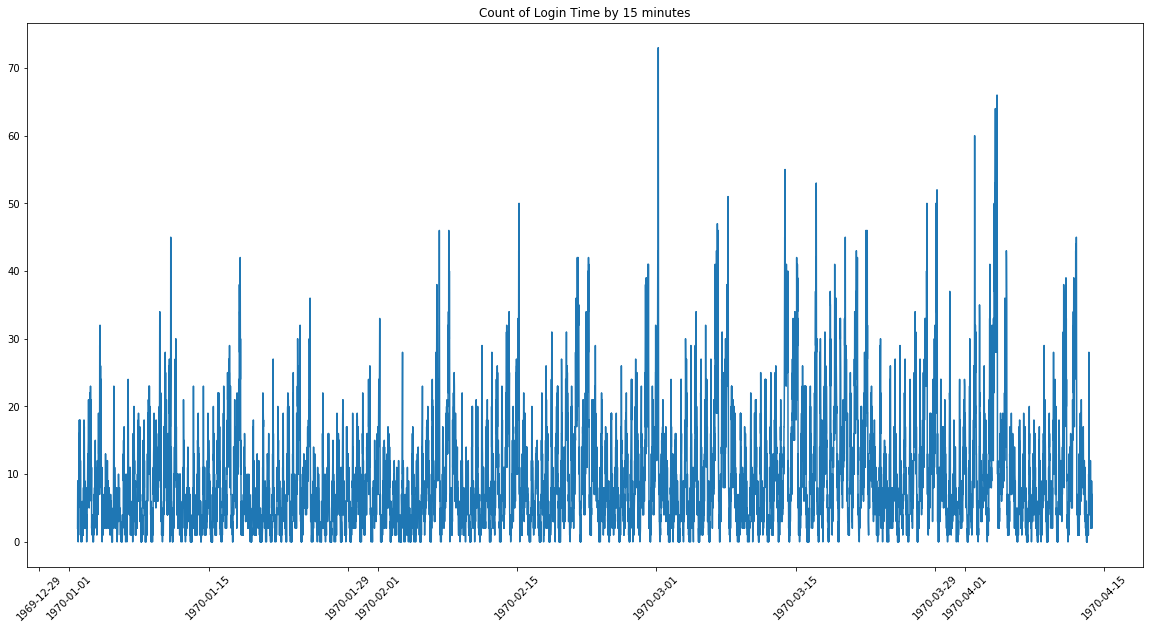

In [6]:
x = df_login_time['login_time']
y = df_login_time['count']
plt.figure(figsize=(20,10))
plt.plot(x,y)
plt.title('Count of Login Time by 15 minutes')
plt.xticks(rotation=45)

The time series shows weekly seasonality. Let see if there are also other patterns by looking into monthly data.

In [7]:
# Separate data into individual months
jan = df_login_time[(df_login_time.login_time > '1970-01') & (df_login_time.login_time < '1970-02')]
feb = df_login_time[(df_login_time.login_time > '1970-02') & (df_login_time.login_time < '1970-03')]
mar = df_login_time[(df_login_time.login_time > '1970-03') & (df_login_time.login_time < '1970-04')]
apr = df_login_time[(df_login_time.login_time > '1970-04')]

(array([719163., 719167., 719171., 719175., 719179., 719183., 719187.,
        719191., 719194.]), <a list of 9 Text xticklabel objects>)

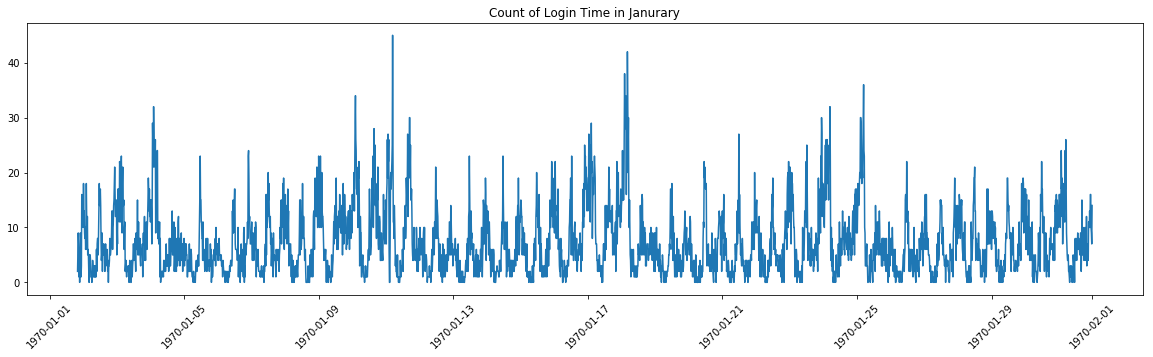

In [8]:
# Graph Janurary
x = jan['login_time']
y = jan['count']
plt.figure(figsize=(20,5))
plt.plot(x,y)
plt.title('Count of Login Time in Janurary')
plt.xticks(rotation=45)

(array([719194., 719198., 719202., 719206., 719210., 719214., 719218.,
        719222.]), <a list of 8 Text xticklabel objects>)

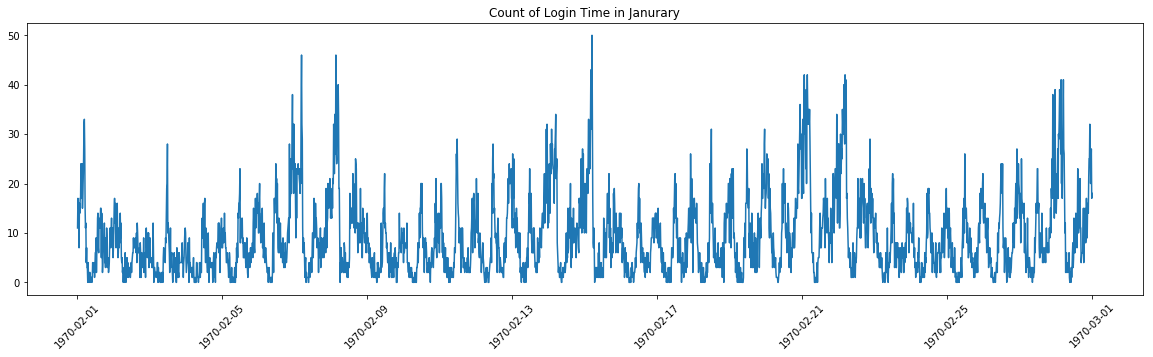

In [9]:
# Graph February
x = feb['login_time']
y = feb['count']
plt.figure(figsize=(20,5))
plt.plot(x,y)
plt.title('Count of Login Time in Janurary')
plt.xticks(rotation=45)

(array([719222., 719226., 719230., 719234., 719238., 719242., 719246.,
        719250., 719253.]), <a list of 9 Text xticklabel objects>)

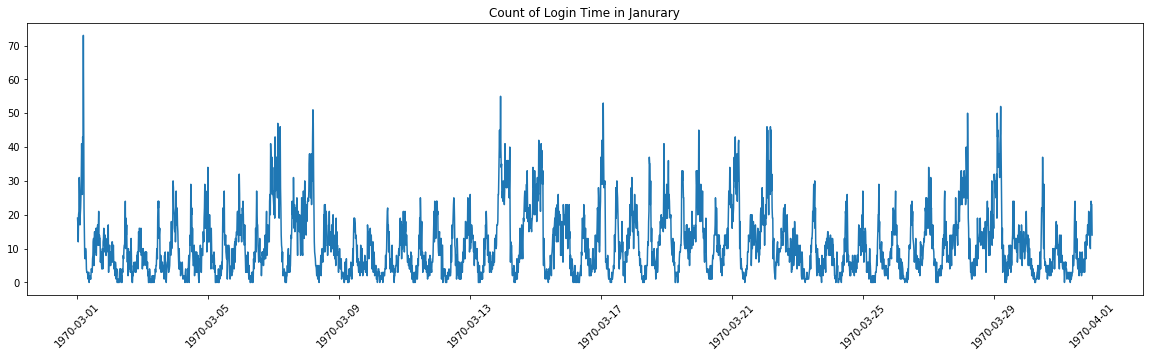

In [10]:
# Graph March
x = mar['login_time']
y = mar['count']
plt.figure(figsize=(20,5))
plt.plot(x,y)
plt.title('Count of Login Time in Janurary')
plt.xticks(rotation=45)

There seems to be an abnormally high login on March 1st, let's take a closer look.

In [11]:
print(mar.head(20))

              login_time  count
5585 1970-03-01 00:15:00     19
5586 1970-03-01 00:30:00     17
5587 1970-03-01 00:45:00     12
5588 1970-03-01 01:00:00     20
5589 1970-03-01 01:15:00     21
5590 1970-03-01 01:30:00     31
5591 1970-03-01 01:45:00     26
5592 1970-03-01 02:00:00     17
5593 1970-03-01 02:15:00     20
5594 1970-03-01 02:30:00     22
5595 1970-03-01 02:45:00     26
5596 1970-03-01 03:00:00     32
5597 1970-03-01 03:15:00     41
5598 1970-03-01 03:30:00     34
5599 1970-03-01 03:45:00     26
5600 1970-03-01 04:00:00     43
5601 1970-03-01 04:15:00     41
5602 1970-03-01 04:30:00     73
5603 1970-03-01 04:45:00     48
5604 1970-03-01 05:00:00     22


The abnormally high login time occured between 4:15AM to 4:30AM on 3/1.

(array([719253., 719255., 719257., 719259., 719261., 719263., 719265.]),
 <a list of 7 Text xticklabel objects>)

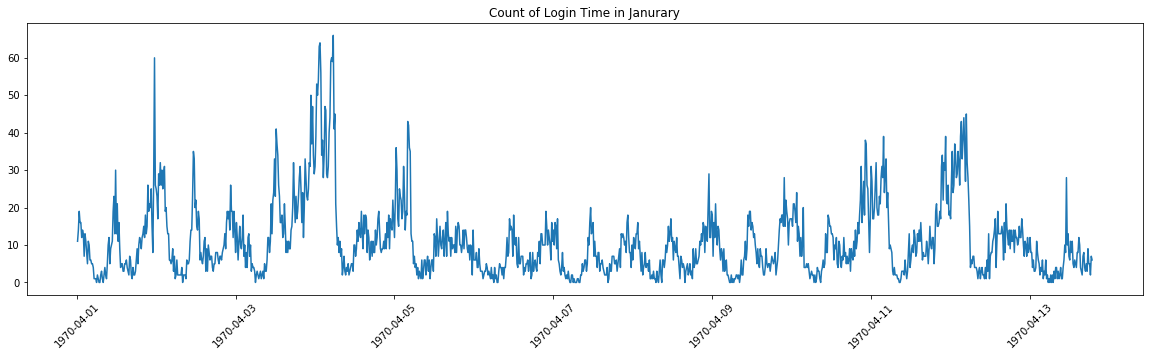

In [12]:
# Graph first two weeks of April
x = apr['login_time']
y = apr['count']
plt.figure(figsize=(20,5))
plt.plot(x,y)
plt.title('Count of Login Time in Janurary')
plt.xticks(rotation=45)

In [13]:
print(apr[90:100])

              login_time  count
8651 1970-04-01 22:45:00     15
8652 1970-04-01 23:00:00      8
8653 1970-04-01 23:15:00     28
8654 1970-04-01 23:30:00     60
8655 1970-04-01 23:45:00     26
8656 1970-04-02 00:00:00     25
8657 1970-04-02 00:15:00     23
8658 1970-04-02 00:30:00     17
8659 1970-04-02 00:45:00     29
8660 1970-04-02 01:00:00     26


There is also an abnormally high login period on 4/1 between 11:15PM to 11:30PM. Overall, there are daily cycles of usage shown from the monthly data. 

In [25]:
df_login_time['Month'] = df_login_time['login_time'].dt.month

# Count by month
df_month = df_login_time.groupby('Month').sum()
df_month = df_month.reset_index()
df_month

,Month,count,day_of_week,hour
0,1,21239,8976,33464
1,2,24673,8064,30912
2,3,33723,8736,34224
3,4,13507,3936,13932


/Users/chinghan75/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5, 1.0, 'Total Count of Each Month')

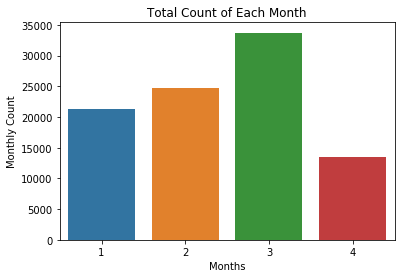

In [26]:
# Plot Monthly Usage Count
sns.barplot(x='Month', y='count', data=df_month)
plt.ylabel('Monthly Count')
plt.xlabel('Months')
plt.title('Total Count of Each Month')

Despite there is only partial data provided in April, we can see usage has been increasing in the three previous months.

In [14]:
df_login_time['day_of_week'] = df_login_time['login_time'].dt.dayofweek
df_login_time.head()

,login_time,count,day_of_week
0,1970-01-01 20:00:00,2,3
1,1970-01-01 20:15:00,6,3
2,1970-01-01 20:30:00,9,3
3,1970-01-01 20:45:00,7,3
4,1970-01-01 21:00:00,1,3


In [15]:
# Count by the day of week (0 = Monday, 6 = Sunday)
df_week = df_login_time.groupby('day_of_week').sum()

# Label day of week by abbreviated name
df_week['week'] = ['Mon','Tue','Wed','Thur','Fri','Sat','Sun']
df_week = df_week.reset_index()
df_week = df_week[['week','count']]
df_week

,week,count
0,Mon,8823
1,Tue,9268
2,Wed,10339
3,Thur,11960
4,Fri,15208
5,Sat,19377
6,Sun,18167


/Users/chinghan75/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5, 1.0, 'Count of logins vs. Hour for 3.5 Months')

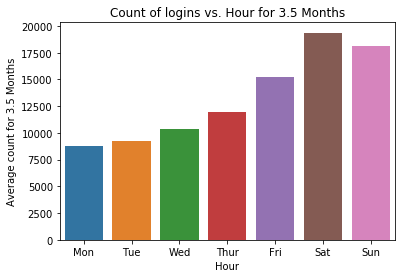

In [16]:
# Graph the count by day of week
sns.barplot(x='week', y='count', data=df_week)
plt.ylabel('Average count for 3.5 Months')
plt.xlabel('Hour')
plt.title('Count of logins vs. Hour for 3.5 Months')

The graph shows usage becomes more frequent towards the weekend and peak usage on Saturdays. Let's also look at user behavior by hours of a day.

/Users/chinghan75/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5, 1.0, 'Count of logins vs. Hour for 3.5 Months')

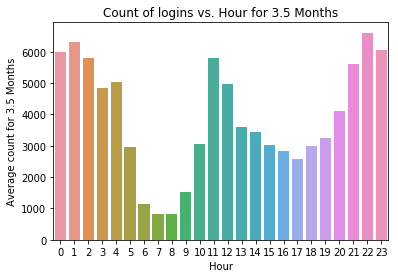

In [17]:
# Label each row by hour of day
df_login_time['hour'] = df_login_time['login_time'].dt.hour

# Count by hour of day
df_hour = df_login_time.groupby('hour').sum()
df_hour = df_hour[['count']]
df_hour = df_hour.reset_index()

# Graph the count by hour of day
sns.barplot(x='hour', y='count', data=df_hour)
plt.ylabel('Average count for 3.5 Months')
plt.xlabel('Hour')
plt.title('Count of logins vs. Hour for 3.5 Months')

The graph above shows user activity tend to be higher around noon and during night time (9pm to 5 am).

---
#### Part 1, Exploratory Data Analysis Summary(logins.json)

- The file is a single item json series file that contains time stamps. The stamps consist of data and time.
- Findings:
    - The data spans 3.5 months, from 1/1 to 4/13
    - There are no null or missing values
    - There seems to be one occurance that the login count is abnormally high, which is between 4:15AM to 4:30AM on 3/1.
    - Usage increased each month since Janurary.
    - Usage is highest during the weekend (Saturday and Sunday). Daily usage is lowest during Monday and increases towards the weekend.
    - User activity has two peak hours around noon and during night time.

### Part 2 ‐ Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:

    a. how you will implement the experiment
    
    b. what statistical test(s) you will conduct to verify the significance of the observation
    
    c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.

### Part 2 - Experiment and metrics design

1. The key measurement of experiment would be the proportions of locations that driver partners in both Gotham and Metropolis are active through out weekdays. If a driver is active exclusively in Gotham, then it's proportion of activity in Gotham and Metropolis is 100% and 0%. To be able to make the measurement and determine whether driver is active according to the circadian rhythms, the following metrics are needed:
    - trip timestamp
    - pick up location
    - drop off location
    

2. Approach:
    - Create an A/B testing
    - Randomly separate all of the driver partners in the two cities into two groups, group A for testing and group B for control.
    - Provide full reimburstment of toll to group A when drivers go across the toll bridge.
    - Track the changes in driver partners activities throughout the day.
    - Calculate, by bootstrapping, whether the porportions of locations that the drivers active are significant different between the two groups.
    
    
3. Result & recommendation:
    - If there are significant difference, determine whether the difference is associated to the circadian rhythems of the two cities.
    - The experiement can also track trip fare and toll reimbursted in each trip to determine whether the experiement is monetarily successful.
    - To determine whether full reimburstment is monetarily feasible, we can measure whether the mean of trip fare of trips after toll reimburstment is greater or less than the mean of trip fare of trips without toll.

## Part 3 ‐ Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.

The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long­term rider retention (again, a few sentences will suffice).


### 3.1 Examine and clean data:

In [35]:
# Loading the json file using pandas
file = open('ultimate_data_challenge.json', 'r')
df = pd.DataFrame(json.load(file))
file.close()
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [36]:
df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


There are three columns that have missing values, which are avg_rating_by_driver, avg_rating_of_driver, and phone type.

In [38]:
df['phone'].value_counts()

iPhone     34582
Android    15022
Name: phone, dtype: int64

There are much more iPhone using riders than Android users. Next, replacing missing values of ratings by the mean values and missing phone types with iPhone.

In [39]:
df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].mean(), inplace=True)
df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].mean(), inplace=True)
df['phone'].fillna('iPhone', inplace=True)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     50000 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


Next, change data features from object to datetime.

In [41]:
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['signup_date'] = pd.to_datetime(df['signup_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     50000 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 4.2+ MB


In [42]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


### 3.2 Exploratory Analysis:

In [55]:
print(df['last_trip_date'].min())
print(df['last_trip_date'].max())

2014-01-01 00:00:00
2014-07-01 00:00:00


The ridership data is available between January 2014 to July 2014. 

In [43]:
df_city = df[['trips_in_first_30_days','city']].groupby(df['city']).sum()
df_city = df_city.reset_index()
df_city

,city,trips_in_first_30_days
0,Astapor,32219
1,King's Landing,24957
2,Winterfell,56734


Text(0.5, 1.0, 'Total Trips Taken In First 30 Days Per City')

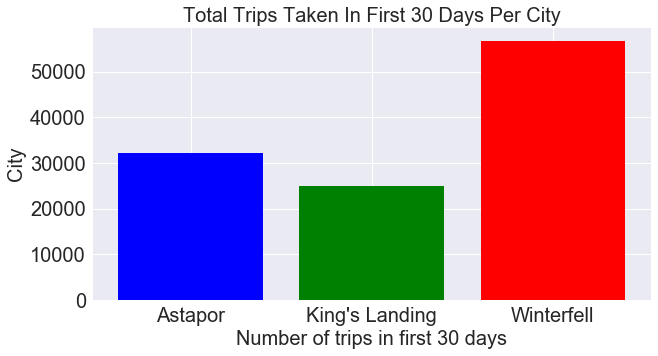

In [44]:
fs=20
plt.subplots(figsize=(10, 5))
plt.bar(df_city.city, df_city.trips_in_first_30_days, color=['b','g','r'])
plt.ylabel('City', fontsize=fs)
plt.yticks(fontsize=fs)
plt.xlabel('Number of trips in first 30 days', fontsize=fs)
plt.xticks(fontsize=fs)
plt.title('Total Trips Taken In First 30 Days Per City', fontsize=fs)

In [45]:
df_phone = df[['trips_in_first_30_days', 'phone']].groupby(df['phone']).sum()
df_phone = df_phone.reset_index()
df_phone

,phone,trips_in_first_30_days
0,Android,29067
1,iPhone,84843


Text(0.5, 1.0, 'Total Trips Taken In First 30 Days Of Each Phone Type')

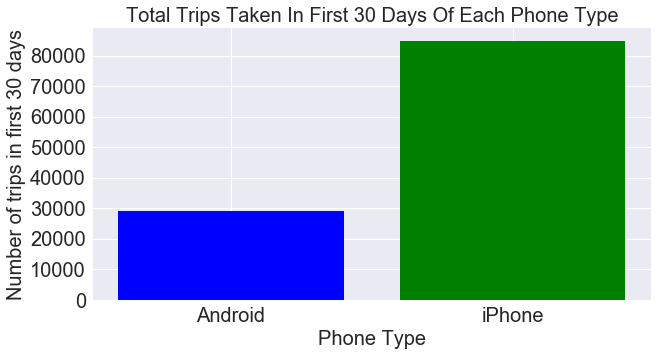

In [46]:
plt.subplots(figsize=(10, 5))
plt.bar(df_phone.phone, df_phone.trips_in_first_30_days, color=['b','g'])
plt.xlabel('Phone Type', fontsize=fs)
plt.xticks(fontsize=fs)
plt.ylabel('Number of trips in first 30 days', fontsize=fs)
plt.yticks(fontsize=fs)
plt.title('Total Trips Taken In First 30 Days Of Each Phone Type', fontsize=fs)

In [48]:
df['phone'].value_counts(normalize=True) * 100

iPhone     69.956
Android    30.044
Name: phone, dtype: float64

In [57]:
# Measure rider retention 
# Preceding 30 days = 06-01 to 07-01
df['retained'] = 1
df.loc[df['last_trip_date'] < '2014-06-01','retained'] = 0
df[['last_trip_date','retained']].head()

,last_trip_date,retained
0,2014-06-17,1
1,2014-05-05,0
2,2014-01-07,0
3,2014-06-29,1
4,2014-03-15,0


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     50000 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
retained                  50000 non-null int64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(2), object(2)
memory usage: 4.6+ MB


In [67]:
#Percentage of retained users
print('Percentage of retained users %.2f' %(len(df[df['retained']==1])/len(df) *100))

Percentage of retained users 37.61


### 3.3 Modeling

Since this is a predictive model of active user retention, random forest classification is used for the model. The training data in this model will exclude sign-up date and last trip date. The generated feature of rider retention is used as testing data.

In [68]:
df_data = df.drop(['signup_date','retained', 'last_trip_date'],axis=1)
df_target = df['retained']

In [69]:
df_data = pd.get_dummies(df_data, columns=['city', 'phone'])
df_data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone
0,3.67,5.0,4.7,1.10,15.4,4,True,46.2,0,1,0,0,1
1,8.26,5.0,5.0,1.00,0.0,0,False,50.0,1,0,0,1,0
2,0.77,5.0,4.3,1.00,0.0,3,False,100.0,1,0,0,0,1
3,2.36,4.9,4.6,1.14,20.0,9,True,80.0,0,1,0,0,1
4,3.13,4.9,4.4,1.19,11.8,14,False,82.4,0,0,1,1,0


In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_data, df_target, test_size=0.33, random_state=42)

In [73]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline as pl

#Set up random forest classifier with no scaling
steps = [("model", RandomForestClassifier(random_state=40))]
pipe = pl(steps)

param_grid = {
    'model__max_depth': [10,50,100],
    'model__criterion': ['gini','entropy'],
    'model__max_features': ['auto','sqrt'],
    'model__min_samples_split': [2,4,8],
    'model__n_estimators': [10,25,50,100]   
}
cv = GridSearchCV(pipe, param_grid, cv=5)
cv.fit(X_train, y_train)

CPU times: user 13min 46s, sys: 14.1 s, total: 14min
Wall time: 14min 2s


In [74]:
cv.best_params_

{'model__criterion': 'gini',
 'model__max_depth': 10,
 'model__max_features': 'auto',
 'model__min_samples_split': 4,
 'model__n_estimators': 50}

In [75]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, precision_recall_curve
def confusion_matrix(model, X_test, y_test):
    
    y_pred_test = model.predict(X_test)
    y_pred_test_prob = model.predict_proba(X_test)
    conf_matrix = metrics.confusion_matrix(y_test, y_pred_test)
    print("Best score is {}".format(model.best_score_))
    print("LogLoss: ", metrics.log_loss(y_test, y_pred_test_prob))
    print(metrics.classification_report(y_test, y_pred_test))
    

    # Displaying the confusion matrix
    fig, ax = plt.subplots(figsize=(6,6))
    ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', fontsize=24)

    #plt.title('Confusion Matrix for %s' % clf_name, size=20)
    plt.xlabel('Predicted label', size=20)
    plt.ylabel('True label', size=20)
    ax.tick_params('x', labelsize = 20)
    ax.tick_params('y', labelsize = 20)
    ax.grid(False)
    plt.tight_layout()

Best score is 0.7842089552238806
LogLoss:  0.46532866067981715
              precision    recall  f1-score   support

           0       0.80      0.86      0.83     10305
           1       0.73      0.65      0.69      6195

   micro avg       0.78      0.78      0.78     16500
   macro avg       0.77      0.76      0.76     16500
weighted avg       0.78      0.78      0.78     16500



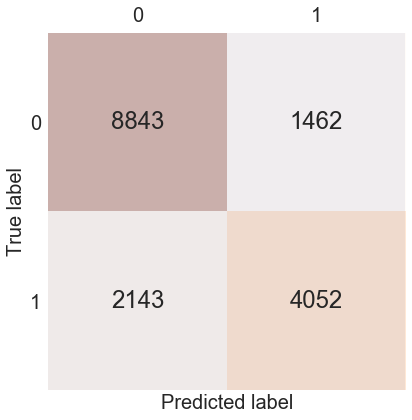

In [76]:
confusion_matrix(cv, X_test, y_test)

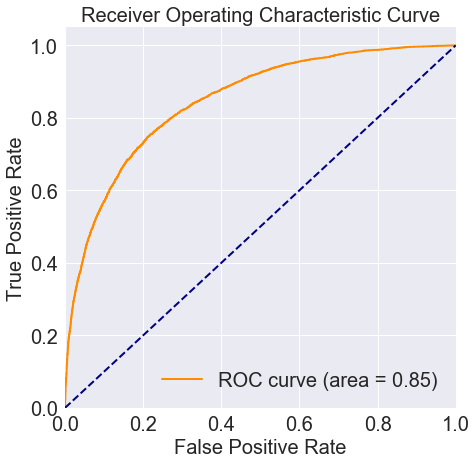

In [111]:
y_score = cv.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 7))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(size=fs)
plt.yticks(size=fs)
plt.xlabel('False Positive Rate', size=fs)
plt.ylabel('True Positive Rate', size=fs)
plt.title('Receiver Operating Characteristic Curve', size=fs)
plt.legend(loc="lower right", fontsize=fs)
plt.show()

### 3.4 Feature Importance

In [102]:
RF_FI = RandomForestClassifier(criterion='gini', max_features='auto', min_samples_split=4, 
                               n_estimators=50, max_depth=10)
RF_FI.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [103]:
feature_importances = pd.DataFrame(RF_FI.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
avg_rating_by_driver,0.159286
weekday_pct,0.147365
avg_surge,0.116245
surge_pct,0.113279
city_King's Landing,0.113271
trips_in_first_30_days,0.062163
avg_dist,0.061430
ultimate_black_user,0.056845
phone_iPhone,0.049664
phone_Android,0.037883


The top five features are the ones with importance greater than 0.10:

1. **average rating by driver** - this loosely indicate the rider's experience with their rides and how it affects their desire to ride again.
2. **weekday percentage** - riders with higher riderships during weekdays may be a communter and is likely to be riding on a regular basis.
3. **average surge & surge percentage** - there are two features related to surge rate shows up in the top five, which indicates that riders who tend to ride with surged rate may be riding for necessity and is less sensitive to price surge. 
4. **city: King's Landing** - this indicates that riders from this city is more likely to be a retained user compared to other cities.

### 3.5 Summary

The model is effective in predicting rider retention from the provided data since average precision and recall rates are greater than 0.75.

From looking at the feature importance of the model, Ultimate can generate a strategy to provide incentives to riders from Astapor and Winterfell to increase retention rate as they have less retention rate compared to riders from King's Landing.